In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [107]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  27000 non-null  object 
 1   Name                         27000 non-null  object 
 2   Gender                       26957 non-null  object 
 3   Age                          27000 non-null  int64  
 4   Income (USD)                 22867 non-null  float64
 5   Income Stability             25494 non-null  object 
 6   Profession                   27000 non-null  object 
 7   Type of Employment           20456 non-null  object 
 8   Location                     27000 non-null  object 
 9   Loan Amount Request (USD)    27000 non-null  float64
 10  Current Loan Expenses (USD)  26840 non-null  float64
 11  Expense Type 1               27000 non-null  object 
 12  Expense Type 2               27000 non-null  object 
 13  Dependents      

In [64]:
df1 = df.drop('Customer ID', axis=1)
df1 = df1.drop('Name', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       26957 non-null  object 
 1   Age                          27000 non-null  int64  
 2   Income (USD)                 22867 non-null  float64
 3   Income Stability             25494 non-null  object 
 4   Profession                   27000 non-null  object 
 5   Type of Employment           20456 non-null  object 
 6   Location                     27000 non-null  object 
 7   Loan Amount Request (USD)    27000 non-null  float64
 8   Current Loan Expenses (USD)  26840 non-null  float64
 9   Expense Type 1               27000 non-null  object 
 10  Expense Type 2               27000 non-null  object 
 11  Dependents                   24759 non-null  float64
 12  Credit Score                 25473 non-null  float64
 13  No. of Defaults 

In [65]:
df1.isnull().sum()

Gender                           43
Age                               0
Income (USD)                   4133
Income Stability               1506
Profession                        0
Type of Employment             6544
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     160
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2241
Credit Score                   1527
No. of Defaults                   0
Has Active Credit Card         1425
Property ID                       0
Property Age                   4379
Property Type                     0
Property Location               307
Co-Applicant                      0
Property Price                    0
Loan Amount                     295
dtype: int64

In [66]:
df1.loc[df1['Current Loan Expenses (USD)'] == -999.0, 'Current Loan Expenses (USD)'] = None
df1.loc[df1['Co-Applicant'] == -999, 'Co-Applicant'] = None
df1.loc[df1['Property Price'] == -999.0, 'Property Price'] = None
df1.loc[df1['Loan Amount'] == -999.0, 'Loan Amount'] = None
df1.isnull().sum()

Gender                           43
Age                               0
Income (USD)                   4133
Income Stability               1506
Profession                        0
Type of Employment             6544
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     325
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2241
Credit Score                   1527
No. of Defaults                   0
Has Active Credit Card         1425
Property ID                       0
Property Age                   4379
Property Type                     0
Property Location               307
Co-Applicant                    150
Property Price                  313
Loan Amount                     596
dtype: int64

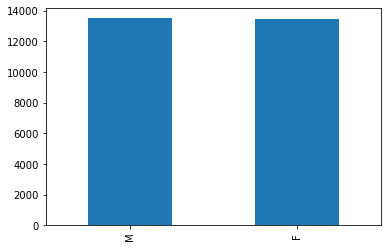

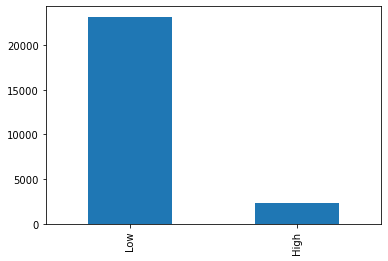

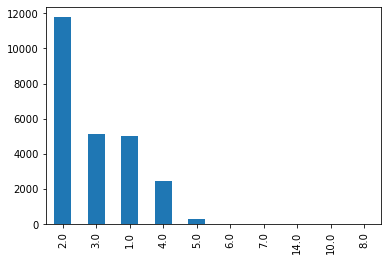

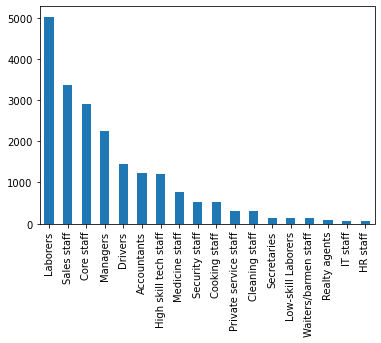

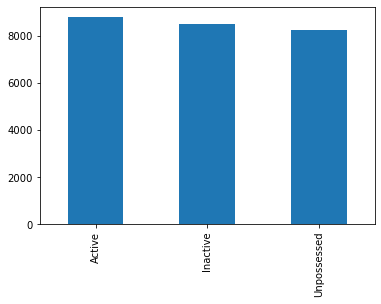

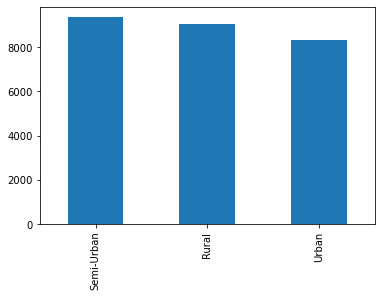

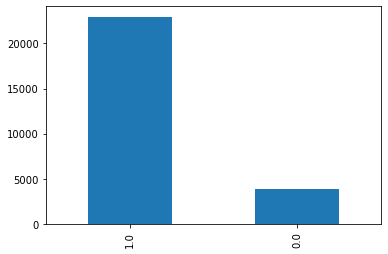

In [53]:
df1['Gender'].value_counts().plot(kind='bar')
plt.show()
df1['Income Stability'].value_counts().plot(kind='bar')
plt.show()
df1['Dependents'].value_counts().plot(kind='bar')
plt.show()
df1['Type of Employment'].value_counts().plot(kind='bar')
plt.show()
df1['Has Active Credit Card'].value_counts().plot(kind='bar')
plt.show()
df1['Property Location'].value_counts().plot(kind='bar')
plt.show()
df1['Co-Applicant'].value_counts().plot(kind='bar')
plt.show()

In [67]:
df1['Gender'] = df1['Gender'].fillna('M')
df1['Income (USD)'] = df1['Income (USD)'].fillna(df1['Income (USD)'].mean())
df1['Income Stability'] = df1['Income Stability'].fillna('Low')
df1['Type of Employment'] = df1['Type of Employment'].fillna('Laborers')
df1['Dependents'] = df1['Dependents'].fillna(2.0)
df1['Credit Score'] = df1['Credit Score'].fillna(df1['Credit Score'].mean())
df1['Property Age'] = df1['Property Age'].fillna(df1['Property Age'].mean())
df1['Co-Applicant'] = df1['Co-Applicant'].fillna(1)
df1['Property Price'] = df1['Property Price'].fillna(df1['Property Price'].mean())
df1['Current Loan Expenses (USD)'] = df1['Current Loan Expenses (USD)'].fillna(df1['Current Loan Expenses (USD)'].mean())
df1['Has Active Credit Card'] = df1['Has Active Credit Card'].fillna('Active')
df1['Property Location'] = df1['Property Location'].fillna('Semi-Urban')
df1.isnull().sum()


Gender                           0
Age                              0
Income (USD)                     0
Income Stability                 0
Profession                       0
Type of Employment               0
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      0
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Age                     0
Property Type                    0
Property Location                0
Co-Applicant                     0
Property Price                   0
Loan Amount                    596
dtype: int64

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       27000 non-null  object 
 1   Age                          27000 non-null  int64  
 2   Income (USD)                 27000 non-null  float64
 3   Income Stability             27000 non-null  object 
 4   Profession                   27000 non-null  object 
 5   Type of Employment           27000 non-null  object 
 6   Location                     27000 non-null  object 
 7   Loan Amount Request (USD)    27000 non-null  float64
 8   Current Loan Expenses (USD)  27000 non-null  float64
 9   Expense Type 1               27000 non-null  object 
 10  Expense Type 2               27000 non-null  object 
 11  Dependents                   27000 non-null  float64
 12  Credit Score                 27000 non-null  float64
 13  No. of Defaults 

In [69]:
df2 = df1.dropna(axis=0)[['Gender','Age', 'Income (USD)', 'Income Stability', 'Profession','Type of Employment',    
                          'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Expense Type 1', 
                          'Expense Type 2', 'Dependents', 'Credit Score', 'No. of Defaults', 'Has Active Credit Card',
                          'Property ID','Property Age', 'Property Type', 'Property Location', 'Co-Applicant', 
                          'Property Price', 'Loan Amount']]
print(df2.shape)
df2.isnull().sum()

(26404, 22)


Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Amount                    0
dtype: int64

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26404 entries, 0 to 26999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       26404 non-null  object 
 1   Age                          26404 non-null  int64  
 2   Income (USD)                 26404 non-null  float64
 3   Income Stability             26404 non-null  object 
 4   Profession                   26404 non-null  object 
 5   Type of Employment           26404 non-null  object 
 6   Location                     26404 non-null  object 
 7   Loan Amount Request (USD)    26404 non-null  float64
 8   Current Loan Expenses (USD)  26404 non-null  float64
 9   Expense Type 1               26404 non-null  object 
 10  Expense Type 2               26404 non-null  object 
 11  Dependents                   26404 non-null  float64
 12  Credit Score                 26404 non-null  float64
 13  No. of Defaults 

In [71]:
x_train = df2[['Gender','Age', 'Income (USD)', 'Income Stability', 'Profession', 'Type of Employment', 'Location',   
                          'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Expense Type 1', 
                          'Expense Type 2', 'Dependents', 'Credit Score', 'No. of Defaults', 'Has Active Credit Card',
                          'Property ID','Property Age', 'Property Type', 'Property Location', 'Co-Applicant', 
                          'Property Price']]
y_train = df2[['Loan Amount']]
x_train.shape, y_train.shape

((26404, 21), (26404, 1))

In [92]:
cols = x_train.select_dtypes('object').columns.values
cols
x_train1 = pd.get_dummies(data=x_train, columns=cols)
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26404 entries, 0 to 26999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       26404 non-null  int64  
 1   Income (USD)                              26404 non-null  float64
 2   Loan Amount Request (USD)                 26404 non-null  float64
 3   Current Loan Expenses (USD)               26404 non-null  float64
 4   Dependents                                26404 non-null  float64
 5   Credit Score                              26404 non-null  float64
 6   No. of Defaults                           26404 non-null  int64  
 7   Property ID                               26404 non-null  int64  
 8   Property Age                              26404 non-null  float64
 9   Property Type                             26404 non-null  int64  
 10  Co-Applicant                      

In [93]:
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
model = LinearRegression()
model.fit(x_train1, y_train)

LinearRegression()

In [94]:
model.score(x_train1,y_train)

0.6597095293647716

In [106]:
td = pd.read_csv('test.csv')
td.info()

FileNotFoundError: [Errno 2] No such file or directory: '/test.csv'

In [80]:
td1 = td.drop('Customer ID', axis=1)
td1 = td1.drop('Name', axis=1)
td1.isnull().sum()

Gender                          10
Age                              0
Income (USD)                   443
Income Stability               177
Profession                       0
Type of Employment             726
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)     12
Expense Type 1                   0
Expense Type 2                   0
Dependents                     252
Credit Score                   176
No. of Defaults                  0
Has Active Credit Card         141
Property ID                      0
Property Age                   471
Property Type                    0
Property Location               49
Co-Applicant                     0
Property Price                   0
dtype: int64

In [81]:
td1.loc[td1['Current Loan Expenses (USD)'] == -999.0, 'Current Loan Expenses (USD)'] = None
td1.loc[td1['Co-Applicant'] == -999, 'Co-Applicant'] = None
td1.loc[td1['Property Price'] == -999.0, 'Property Price'] = None
td1.isnull().sum()

Gender                          10
Age                              0
Income (USD)                   443
Income Stability               177
Profession                       0
Type of Employment             726
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)     24
Expense Type 1                   0
Expense Type 2                   0
Dependents                     252
Credit Score                   176
No. of Defaults                  0
Has Active Credit Card         141
Property ID                      0
Property Age                   471
Property Type                    0
Property Location               49
Co-Applicant                    18
Property Price                  39
dtype: int64

In [82]:
td1['Gender'] = td1['Gender'].fillna('M')
td1['Income (USD)'] = td1['Income (USD)'].fillna(td1['Income (USD)'].mean())
td1['Income Stability'] = td1['Income Stability'].fillna('Low')
td1['Type of Employment'] = td1['Type of Employment'].fillna('Laborers')
td1['Dependents'] = td1['Dependents'].fillna(2.0)
td1['Credit Score'] = td1['Credit Score'].fillna(td1['Credit Score'].mean())
td1['Property Age'] = td1['Property Age'].fillna(td1['Property Age'].mean())
td1['Co-Applicant'] = td1['Co-Applicant'].fillna(1)
td1['Property Price'] = td1['Property Price'].fillna(td1['Property Price'].mean())
td1['Current Loan Expenses (USD)'] = td1['Current Loan Expenses (USD)'].fillna(td1['Current Loan Expenses (USD)'].mean())
td1['Has Active Credit Card'] = td1['Has Active Credit Card'].fillna('Active')
td1['Property Location'] = td1['Property Location'].fillna('Semi-Urban')
td1.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [83]:
td1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Income (USD)                 3000 non-null   float64
 3   Income Stability             3000 non-null   object 
 4   Profession                   3000 non-null   object 
 5   Type of Employment           3000 non-null   object 
 6   Location                     3000 non-null   object 
 7   Loan Amount Request (USD)    3000 non-null   float64
 8   Current Loan Expenses (USD)  3000 non-null   float64
 9   Expense Type 1               3000 non-null   object 
 10  Expense Type 2               3000 non-null   object 
 11  Dependents                   3000 non-null   float64
 12  Credit Score                 3000 non-null   float64
 13  No. of Defaults   

In [86]:
col2 = td1.select_dtypes('object').columns.values
col2
x_test = pd.get_dummies(data=td1, columns=col2)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       3000 non-null   int64  
 1   Income (USD)                              3000 non-null   float64
 2   Loan Amount Request (USD)                 3000 non-null   float64
 3   Current Loan Expenses (USD)               3000 non-null   float64
 4   Dependents                                3000 non-null   float64
 5   Credit Score                              3000 non-null   float64
 6   No. of Defaults                           3000 non-null   int64  
 7   Property ID                               3000 non-null   int64  
 8   Property Age                              3000 non-null   float64
 9   Property Type                             3000 non-null   int64  
 10  Co-Applicant                        

In [87]:
x_test.insert(16, "Profession_Businessman", [0]*3000)
x_test.insert(18, "Profession_Maternity leave", [0]*3000)
x_test.insert(21, "Profession_Student", [0]*3000)
x_test.insert(22, "Profession_Unemployed", [0]*3000)
x_test['Profession_Businessman'] = x_test['Profession_Businessman'].astype(np.uint8)
x_test['Profession_Maternity leave'] = x_test['Profession_Maternity leave'].astype(np.uint8)
x_test['Profession_Student'] = x_test['Profession_Student'].astype(np.uint8)
x_test['Profession_Unemployed'] = x_test['Profession_Unemployed'].astype(np.uint8)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       3000 non-null   int64  
 1   Income (USD)                              3000 non-null   float64
 2   Loan Amount Request (USD)                 3000 non-null   float64
 3   Current Loan Expenses (USD)               3000 non-null   float64
 4   Dependents                                3000 non-null   float64
 5   Credit Score                              3000 non-null   float64
 6   No. of Defaults                           3000 non-null   int64  
 7   Property ID                               3000 non-null   int64  
 8   Property Age                              3000 non-null   float64
 9   Property Type                             3000 non-null   int64  
 10  Co-Applicant                        

In [88]:
x_test = scaler.fit_transform(x_test)
y_pred = model.predict(x_test)
result = pd.DataFrame(y_pred)
result.insert(0, "Customer_ID", td['Customer ID'])
result

,Customer_ID,0
0,C-6692,58960.0
1,C-25987,185936.0
2,C-5051,140944.0
3,C-12745,112592.0
4,C-8292,22928.0
...,...,...
2995,C-11467,24720.0
2996,C-35487,158736.0
2997,C-23221,85136.0
2998,C-25999,129936.0


In [103]:
result.rename(columns = {0 : 'Loan Amount'}, inplace = True)
result

,Customer_ID,Loan Amount
0,C-6692,58960.0
1,C-25987,185936.0
2,C-5051,140944.0
3,C-12745,112592.0
4,C-8292,22928.0
...,...,...
2995,C-11467,24720.0
2996,C-35487,158736.0
2997,C-23221,85136.0
2998,C-25999,129936.0


In [104]:
result.to_csv('19085436D.csv', index=False)